In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [80]:
def select_sentiment(x):
    return x[['sentiment']]

def select_readability(x):
    return x[['readability']]

def select_word_count(x):
    return x[['word_count']]

def select_vader_sentiment(x):
    return x[['vader_sentiment']]
    
# For extracting the 'text' column
def select_text(x):
    return x['text']

def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

In [59]:
data = pd.read_csv('WELFake_Dataset.csv',index_col=0)
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [63]:
data = data.dropna()
data['text'] = data['text'].fillna('').astype(str)

In [64]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(columns=['title']) 

In [65]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

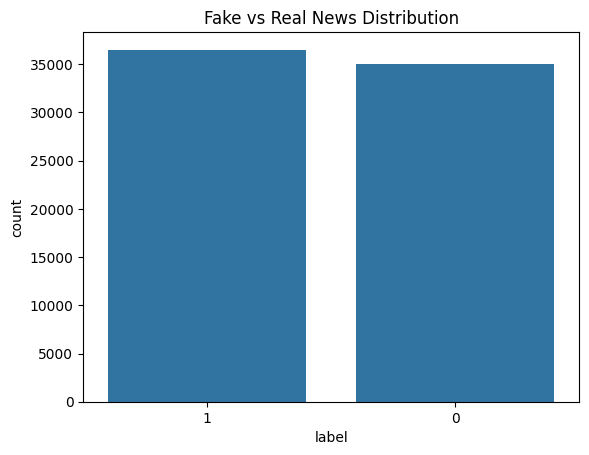

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='label', order=data['label'].value_counts().index)
plt.title("Fake vs Real News Distribution")
plt.show()

In [68]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package punkt to C:\Users\Zul
[nltk_data]     Zaki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Zul
[nltk_data]     Zaki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to C:\Users\Zul
[nltk_data]     Zaki\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [69]:
from nltk.corpus import stopwords

def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove punctuation
        preprocessed_text.append(' '.join(token.lower()
            for token in sentence.split()
            if token.lower() not in stopwords.words('english')))
    return preprocessed_text

# Apply to 'text' column
data['text'] = preprocess_text(data['text'].values)

100%|███████████████████████████████████| 71537/71537 [2:12:42<00:00,  8.98it/s]


In [70]:
from textblob import TextBlob
import textstat

# Sentiment Score using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Readability Score using Flesch Reading Ease
def get_readability(text):
    return textstat.flesch_reading_ease(text)

# Word Count
def get_word_count(text):
    return len(text.split())

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """Select text column from dataframe"""
    def __init__(self, column):
        self.column = column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column]

class SentimentSelector(BaseEstimator, TransformerMixin):
    """Select sentiment column from dataframe"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[['sentiment']]

class ReadabilitySelector(BaseEstimator, TransformerMixin):
    """Select readability column from dataframe"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[['readability']]

class WordCountSelector(BaseEstimator, TransformerMixin):
    """Select word_count column from dataframe"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[['word_count']]

class VaderSentimentSelector(BaseEstimator, TransformerMixin):
    """Select vader_sentiment column from dataframe"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[['vader_sentiment']]

In [71]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Zul
[nltk_data]     Zaki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
data['sentiment'] = data['text'].apply(get_sentiment)
data['readability'] = data['text'].apply(get_readability)
data['word_count'] = data['text'].apply(get_word_count)
data['vader_sentiment'] = data['text'].apply(get_vader_sentiment)

In [73]:
from sklearn.model_selection import train_test_split

X = data[['text', 'sentiment', 'readability', 'word_count', 'vader_sentiment']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

# Non-text features
meta_features = ColumnTransformer([
    ('sentiment', SentimentSelector(), ['sentiment']),
    ('readability', ReadabilitySelector(), ['readability']),
    ('word_count', WordCountSelector(), ['word_count']),
    ('vader_sentiment', VaderSentimentSelector(), ['vader_sentiment'])
])

In [88]:
# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('selector', TextSelector('text')),
            ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
        ])),
        ('meta', meta_features)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [89]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('selector', TextSelector('text')),
            ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
        ])),
        ('meta', meta_features)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [90]:
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print("🔷 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=["Fake", "Real"]))

# Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("🔶 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=["Fake", "Real"]))

🔷 Decision Tree Results
Accuracy: 0.939544310875035
              precision    recall  f1-score   support

        Fake       0.94      0.93      0.94      6982
        Real       0.94      0.95      0.94      7326

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308

🔶 Random Forest Results
Accuracy: 0.963726586525021
              precision    recall  f1-score   support

        Fake       0.97      0.95      0.96      6982
        Real       0.96      0.97      0.96      7326

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



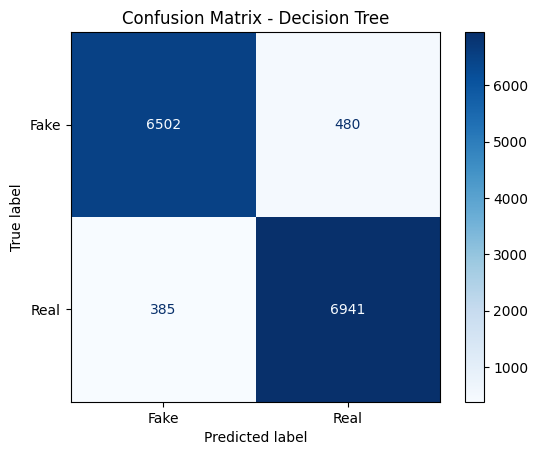

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Fake", "Real"])
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

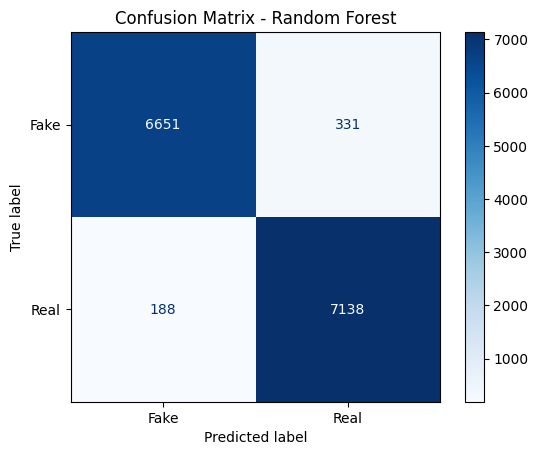

In [83]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Fake", "Real"])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [93]:
import joblib

joblib.dump(rf_pipeline, "fake_news_rf_pipeline.pkl")

['fake_news_rf_pipeline.pkl']

In [94]:
joblib.dump(dt_pipeline, "fake_news_dt_pipeline.pkl")

['fake_news_dt_pipeline.pkl']